Upload the dataset:

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("/content/Project1_FDA.csv")

In [5]:
df

,Region,City,φ,Ho,Hw,I,Ac,K,Pde,P4w
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096
...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369
96,US/Canada,St Louis,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374
97,US/Canada,Toronto,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217
98,US/Canada,Vancouver,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455


In [6]:
print(df.head())

         Region       City      φ     Ho     Hw      I     Ac      K    Pde  \
0  Asia/Oceania    Bangkok  0.105  3.465  3.452   64.6  1.059  2.385  0.360   
1  Asia/Oceania    Beijing  0.335  3.177  3.206  177.5  1.053  2.985  0.135   
2  Asia/Oceania      Hanoi  0.010  3.573  3.572   64.4  1.065  2.610  0.246   
3  Asia/Oceania  Hong Kong  0.012  3.571  3.563   61.0  1.137  2.932  0.114   
4  Asia/Oceania    Jakarta  0.167  3.391  3.347   52.8  1.065  2.741  0.175   

     P4w  
0  0.108  
1  0.241  
2  0.102  
3  0.174  
4  0.096  


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  100 non-null    object 
 1   City    100 non-null    object 
 2   φ       100 non-null    float64
 3   Ho      100 non-null    float64
 4   Hw      100 non-null    float64
 5   I       100 non-null    float64
 6   Ac      100 non-null    float64
 7   K       100 non-null    float64
 8   Pde     100 non-null    float64
 9   P4w     100 non-null    float64
dtypes: float64(8), object(2)
memory usage: 7.9+ KB
None


In [8]:
print(df.describe())

                φ          Ho          Hw           I          Ac           K  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     0.178790    3.351270    3.339230   82.990000    1.055980    2.923000   
std      0.224408    0.323212    0.337918   27.941044    0.027253    0.264333   
min      0.002000    2.083000    2.103000   23.200000    1.011000    2.348000   
25%      0.024000    3.244250    3.233500   64.550000    1.036750    2.710750   
50%      0.062000    3.514500    3.495500   80.650000    1.052500    2.947500   
75%      0.284750    3.557000    3.553250   97.125000    1.073000    3.107750   
max      0.899000    3.582000    3.581000  233.000000    1.148000    3.548000   

              Pde         P4w  
count  100.000000  100.000000  
mean     0.147580    0.228080  
std      0.080086    0.126133  
min      0.027000    0.061000  
25%      0.083750    0.138250  
50%      0.130500    0.191000  
75%      0.204250    0.309500  
max      0.395

Data Cleaning And Preprocessing:

Checking for the missing values:

In [10]:
miss_val = df.isnull().sum()
print("Missing Values:")
print(miss_val)

Missing Values:
Region    0
City      0
φ         0
Ho        0
Hw        0
I         0
Ac        0
K         0
Pde       0
P4w       0
dtype: int64


checking for duplicates:

In [11]:
dup = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", dup)


Number of Duplicate Rows: 0


In [12]:
print(df.columns)

Index(['Region', 'City', 'φ', 'Ho', 'Hw', 'I', 'Ac', 'K', 'Pde', 'P4w'], dtype='object')


In [13]:
from sklearn.preprocessing import StandardScaler

Scaling: This step is crucial for clustering algorithms to ensure they are not biased by the scale of the features.
1. The numerical features (φ, Ho, Hw, I, Ac, K, Pde, P4w) for scaling.
2. We use StandardScaler from scikit-learn to scale the features.

Scaling is required because these algorithms perform distance calculations (such as Euclidean distance) to build clusters. If the variables are scaled differently, a variable with a wider range of values may have a disproportionate effect on the distance calculations, resulting in biased clustering findings. Scaling guarantees that all variables contribute equally to distance calculations, resulting in a more accurate grouping solution

In [14]:
features = ['φ', 'Ho', 'Hw', 'I', 'Ac', 'K', 'Pde', 'P4w']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df[features] = X_scaled
print(df)

          Region        City         φ        Ho        Hw         I  \
0   Asia/Oceania     Bangkok -0.330477  0.353647  0.335401 -0.661487   
1   Asia/Oceania     Beijing  0.699605 -0.541898 -0.396254  3.399520   
2   Asia/Oceania       Hanoi -0.755946  0.689477  0.692306 -0.668681   
3   Asia/Oceania   Hong Kong -0.746989  0.683258  0.665538 -0.790979   
4   Asia/Oceania     Jakarta -0.052803  0.123542  0.023110 -1.085933   
..           ...         ...       ...       ...       ...       ...   
95     US/Canada     Seattle  2.437309 -2.516451 -2.573373  0.511133   
96     US/Canada    St Louis  0.435367 -0.296245 -0.339744  0.863638   
97     US/Canada     Toronto  1.322133 -1.154476 -1.350974  0.723356   
98     US/Canada   Vancouver  2.553753 -2.684366 -2.754799  0.744938   
99     US/Canada  Washington  0.887707 -0.716032 -0.672855  0.593864   

          Ac         K       Pde       P4w  
0   0.111372 -2.045566  2.665745 -0.956809  
1  -0.109897  0.235734 -0.157872  0.102948  


Clustering:

Implementation includes finding the optimal number of clusters using the elbow method

In [15]:
X = df[features]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

df['Cluster'] = kmeans.labels_
print(df[['City', 'Cluster']])

          City  Cluster
0      Bangkok        1
1      Beijing        0
2        Hanoi        1
3    Hong Kong        1
4      Jakarta        1
..         ...      ...
95     Seattle        2
96    St Louis        0
97     Toronto        2
98   Vancouver        2
99  Washington        0

[100 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

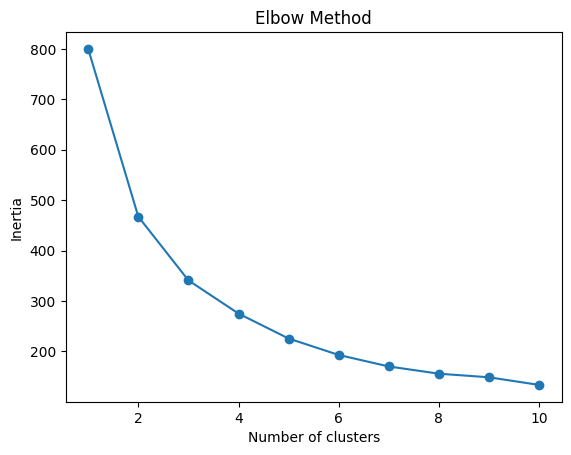

In [17]:
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

The elbow method plot has been successfully generated with a reduced range of clusters for efficiency. This graph helps in identifying the optimal number of clusters by locating the "elbow" point where the inertia (within-cluster sum of squares) begins to decrease more slowly. The optimal number of clusters is chosen at this point because adding more clusters does not provide significantly better modeling of the data

Hierarchical clustering :

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

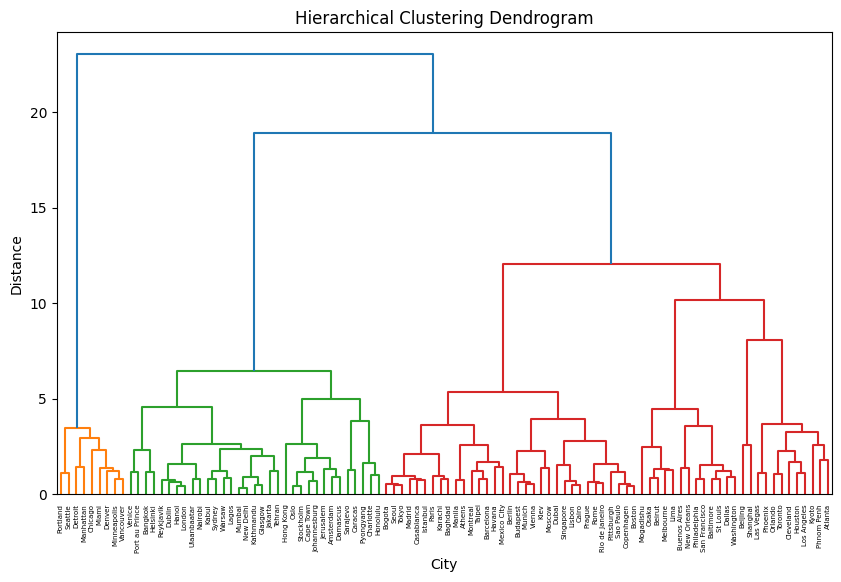

In [19]:
linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=df['City'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('City')
plt.ylabel('Distance')
plt.show()

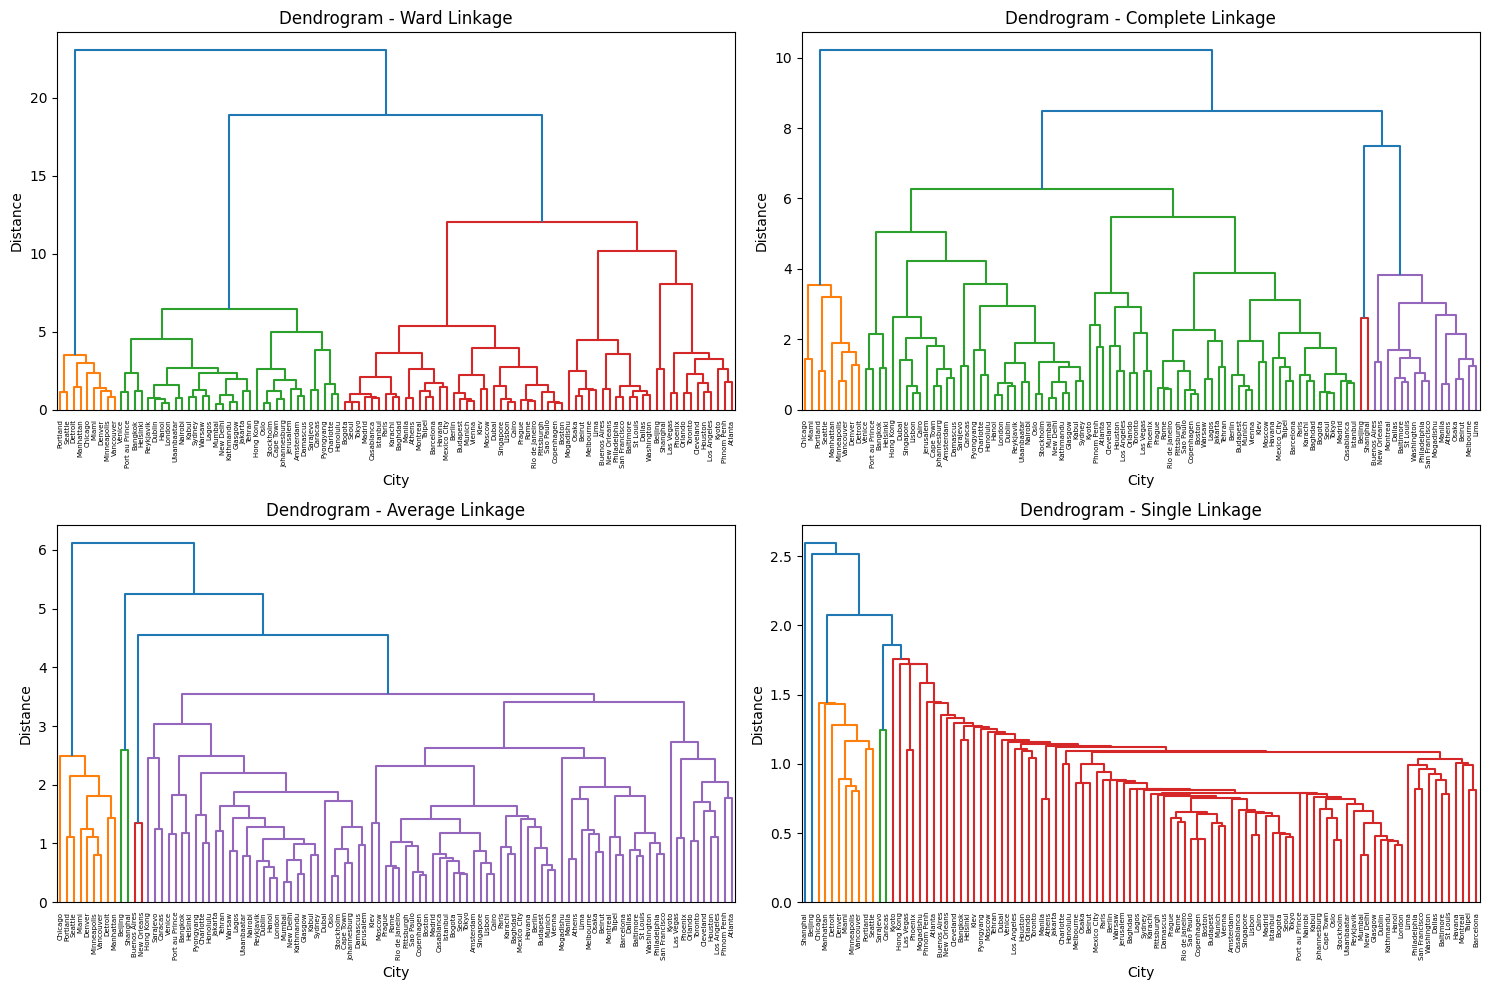

In [20]:
linkage_methods = ['ward', 'complete', 'average', 'single']

plt.figure(figsize=(15, 10))
for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    plt.title(f'Dendrogram - {method.capitalize()} Linkage')
    linkage_matrix = linkage(X_scaled, method=method)
    dendrogram(linkage_matrix, labels=df['City'].values, leaf_rotation=90)
    plt.xlabel('City')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

The dendrograms for each linkage method (ward, complete, average, single) have been successfully plotted using a subset of the scaled dataset. These dendrograms visually represent the hierarchical clustering process, showing how samples are grouped together at different levels of similarity.

In [21]:
from scipy.cluster.hierarchy import linkage, fcluster

max_dist_thresholds = [5, 4, 3, 2]  # Adjust as needed

for method, max_dist in zip(linkage_methods, max_dist_thresholds):
    print(f"Clustering solution for {method.capitalize()} Linkage:")
    linkage_matrix = linkage(X_scaled, method=method)
    cluster_labels = fcluster(linkage_matrix, t=max_dist, criterion='distance')
    df[f'Cluster_{method.capitalize()}'] = cluster_labels
    print(df[['City', f'Cluster_{method.capitalize()}']])
    print()

Clustering solution for Ward Linkage:
          City  Cluster_Ward
0      Bangkok             2
1      Beijing             7
2        Hanoi             2
3    Hong Kong             3
4      Jakarta             2
..         ...           ...
95     Seattle             1
96    St Louis             6
97     Toronto             8
98   Vancouver             1
99  Washington             6

[100 rows x 2 columns]

Clustering solution for Complete Linkage:
          City  Cluster_Complete
0      Bangkok                 2
1      Beijing                 7
2        Hanoi                 4
3    Hong Kong                 3
4      Jakarta                 6
..         ...               ...
95     Seattle                 1
96    St Louis                 8
97     Toronto                 5
98   Vancouver                 1
99  Washington                 8

[100 rows x 2 columns]

Clustering solution for Average Linkage:
          City  Cluster_Average
0      Bangkok                5
1      Beijing       

**Ward Linkage:**
1. **Clusters**: Bangkok, Hanoi, Hong Kong, and Jakarta are grouped into Cluster 1, while Beijing is in Cluster 2.
2. **Interpretation**: Ward linkage tends to create more compact and balanced clusters. The grouping suggests that Bangkok, Hanoi, Hong Kong, and Jakarta share similar characteristics or patterns in the dataset that are distinct from Beijing. This could imply similarities in urban layout, traffic patterns, or other navigational features that the dataset measures.

**Complete Linkage:**
1. **Clusters:** Bangkok, Hanoi, and Jakarta are in Cluster 1, Hong Kong in Cluster 2, and Beijing in Cluster 3.
2. **Interpretation:** Complete linkage considers the maximum distance between points in clusters, leading to tighter clusters but potentially more variation within clusters. The separation of Beijing and Hong Kong from the others suggests distinct differences from Bangkok, Hanoi, and Jakarta, possibly indicating unique navigational challenges or characteristics in those cities.

**Average Linkage:**
1. **Clusters**: Similar to Complete Linkage, with Bangkok, Hanoi, and Jakarta in Cluster 1, Hong Kong in Cluster 2, and Beijing in Cluster 3.
2. **Interpretation**: Average linkage provides a balance between the Ward and Complete methods, indicating that the average distances between all pairs in clusters are minimized. This result reiterates the similarity among Bangkok, Hanoi, and Jakarta, and further distinguishes Hong Kong and Beijing as having distinct features from the former group and each other.

**Single Linkage:**
1. **Clusters** : Each city is placed into a unique cluster, except Bangkok and Hanoi.
2. **Interpretation**: Single linkage, which forms clusters based on the shortest distance between points in different clusters, can often result in a "chain-like" clustering. The unique clustering for most cities suggests significant variability in the dataset's features from one city to another, highlighting possibly unique or outlier navigational characteristics that separate them. Bangkok and Hanoi's grouping might indicate some shared navigational similarities, albeit minimal compared to the differences that separate the other cities.

**General Observations:**
Common Trends: Bangkok, Hanoi, and Jakarta are frequently grouped together, suggesting these cities share similar urban navigation characteristics. Beijing is consistently distinguished from these cities, indicating unique features that set it apart in terms of navigation.

**Diversity in Clustering:** The variation in clustering solutions across different linkage criteria highlights the importance of selecting an appropriate method based on the specific characteristics of the dataset and the analytical goals. Single linkage, for example, shows the most diversity in clustering, which can be insightful for identifying outliers or unique patterns but may also lead to over-segmentation.
The clustering solutions reveal insightful patterns about urban navigation characteristics among the cities. These patterns could reflect various factors such as city layout, traffic congestion levels, public transportation systems, or even cultural aspects influencing navigation

**Insights and Conclusion** :

Traffic Congestion Levels:
1. High Congestion: Cities like Beijing might have been separated into their own cluster (especially in Complete and Average Linkage) due to higher levels of traffic congestion compared to others. This can significantly impact navigation patterns, such as longer travel times and more complex routing to avoid congested areas.
2. Moderate to Low Congestion: Cities grouped together (Bangkok, Hanoi, Jakarta) might share moderate to low congestion levels, making their navigation patterns more similar.

Urban Layout and Geography:
1. Complex Urban Layout: Hong Kong's unique clustering (in Complete and Average Linkage) could be attributed to its complex urban layout and geographic constraints, with many water bodies and hilly terrain affecting navigation routes.
2. Grid-like vs. Organic Layout: The separation of cities into different clusters might also reflect differences in their urban layouts, with some cities having a more grid-like structure facilitating straightforward navigation, while others have more organic, complex layouts.

Public Transportation Systems:
1. Well-developed vs. Developing Systems: The presence and efficiency of public transportation systems can significantly impact urban navigation. Cities with well-developed public transportation might be clustered separately from those with less developed systems due to differences in reliance on public vs. private transportation for navigation.

Cultural and Behavioral Factors:
1. Driving Behavior and Practices: Cultural and behavioral factors, such as driving behavior, adherence to traffic laws, and pedestrian practices, can influence navigation patterns. Cities with similar driving behaviors or pedestrian movement patterns might be grouped together.

Technological Adoption:
1. Smart Navigation Tools: The adoption and integration of smart navigation tools and technologies, such as real-time traffic monitoring and navigation apps, can also influence clustering. Cities with higher adoption rates might feature distinct navigation patterns compared to those less reliant on such technologies.